# **Функция plt.scatter(). Диаграммы рассеяния**

За построение точечных диаграмм в библиотеке *matplotlib* отвечает функция `plt.scatter()`. Чтобы построить график, данной функции следует передать значения для осей абсцисс и ординат.

**Дополнительные аргументы:**
* `edgecolor`: позволяет менять цвет границ точек.
* `linewidth`: позволяет менять ширину границ точек.
* `alpha`: позволяет менять прозрачность точек. Имеет практическую пользу - позволяет обратить внимание, в каких местах плотность точек выше.

Функция `plt.scatter()` предоставляет возможность раскрасить точки графика, исходя из определённого условия. Это возможно реализовать, используя параметры `c` и `cmap`. Параметр `c` принимает на вход список или массив чисел и далее, в зависимости от выбранной цветовой карты `cmap`, из этой цветовой карты выбирается тот цвет, который соответствует числу параметра `c`.

Функция `plt.colorbar()` выводит шкалу цвета на экран. Имя задаётся при помощи функции `set_label()` (пример).

**Примечание:** полный список значений (цветовых карт) для `cmap` можно посмотреть следующим образом:

`from matplotlib import colormaps`

`list(colormaps)`

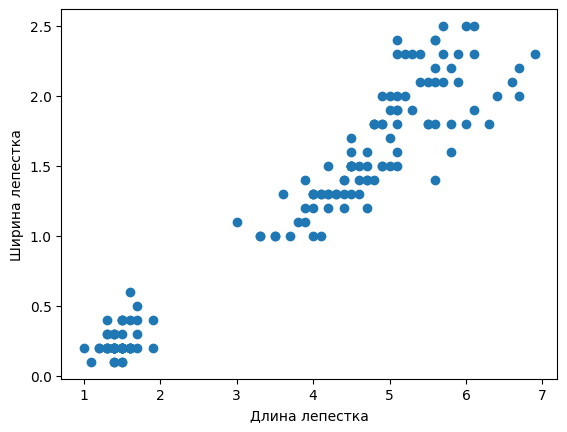

In [21]:
# пример построения диаграммы рассеяния
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = df['petal length (cm)']
y = df['petal width (cm)']

plt.scatter(x, y)
# есть и такой синтаксис 
# plt.scatter(x='petal length (cm)', y='petal width (cm)', data=df)

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

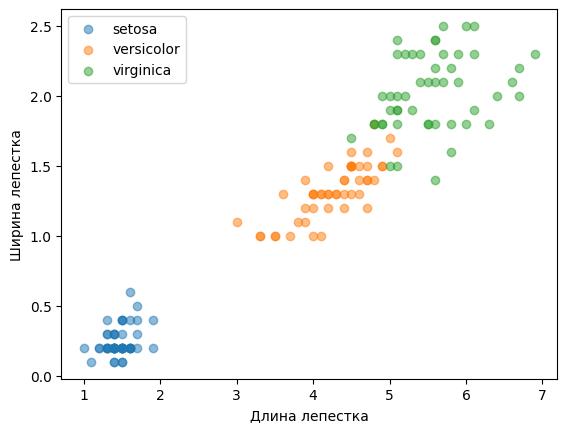

In [22]:
# пример построения диаграммы рассеяния с отнесением каждой точки к своему классу через groupby и цикл
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = 'petal length (cm)'
y = 'petal width (cm)'

groups = df.groupby('target')

for name, group in groups:
    plt.scatter(group[x], group[y], label=name, alpha=0.5)

plt.legend()
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

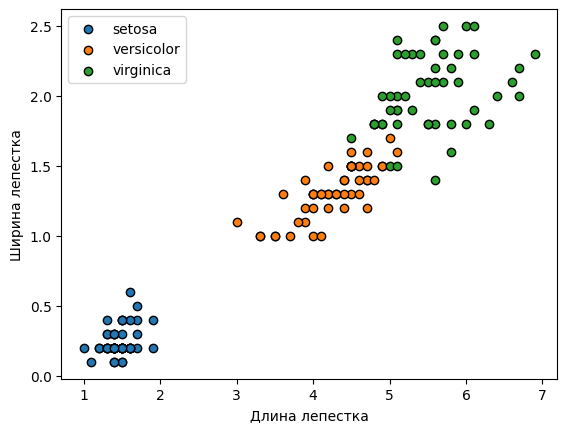

In [23]:
# пример построения диаграммы рассеяния с отнесением каждой точки к своему классу без groupby и цикла
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x1 = df[df['target'] == 'setosa']['petal length (cm)']
y1 = df[df['target'] == 'setosa']['petal width (cm)']

x2 = df[df['target'] == 'versicolor']['petal length (cm)']
y2 = df[df['target'] == 'versicolor']['petal width (cm)']

x3 = df[df['target'] == 'virginica']['petal length (cm)']
y3 = df[df['target'] == 'virginica']['petal width (cm)']

fig, ax = plt.subplots()

ax.scatter(x1, y1, label='setosa', edgecolor='black')
ax.scatter(x2, y2, label='versicolor', edgecolor='black')
ax.scatter(x3, y3, label='virginica', edgecolor='black')

plt.legend()
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

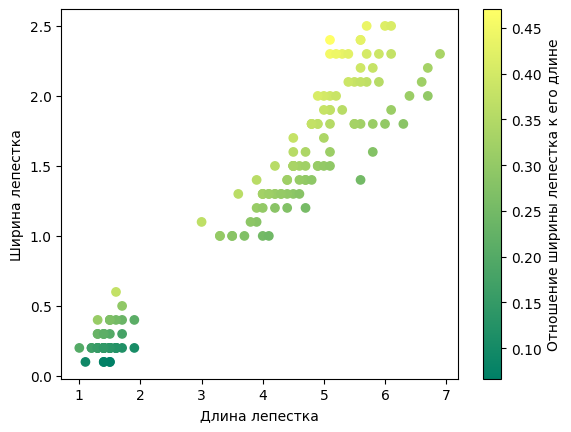

In [24]:
# пример раскрашивания точек исходя из определённого условия
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = df['petal length (cm)']
y = df['petal width (cm)']
z = df['petal width (cm)'] / df['petal length (cm)']

plt.scatter(x, y, c=z, cmap='summer')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

cbar = plt.colorbar()
cbar.set_label('Отношение ширины лепестка к его длине')

plt.show()

# **Функции plt.bar() и plt.barh(). Столбчатые диаграммы**

Функция `plt.bar()` позволяет строить столбчатые диаграммы.

**Дополнительные параметры:**
* `width`: ширина столбцов.
* `color`: цвет.
* `alpha`: прозрачность.
* `edgecolor`: цвет линии границы столбца.
* `linewidth`: ширина линии границы столбца.

Функция `plt.bart()` позволяет строить столбчатые диаграммы с горизонтальным расположением столбцов.

**Дополнительные параметры:**
* `height`: ширина столбцов.
* `color`: цвет.
* `alpha`: прозрачность.
* `edgecolor`: цвет линии границы столбца.
* `linewidth`: ширина линии границы столбца.

Подписи к столбцам добавляются при помощи функции `plt.bar_label()` (пример).

Если необходимо отложить на графике столбцы для двух переменных, то во избежание наложения столбцов друг на друга необходимо регулировать позицию столбцов относительно метки и их ширину (пример). Если нет необходимости кастомизации, проще пользоваться функцией `pd.plot()`.

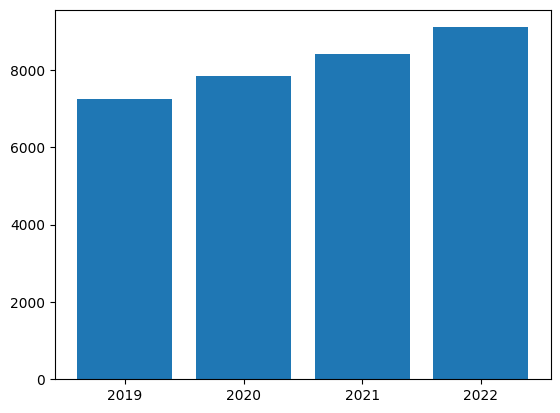

In [25]:
# дефолтная столбчатая диаграмма
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']
df = pd.DataFrame(df_values, columns=df_columns)

plt.bar(df['Год'], df['Торговые площади X5Group, тыс. кв.м.'])

plt.show()

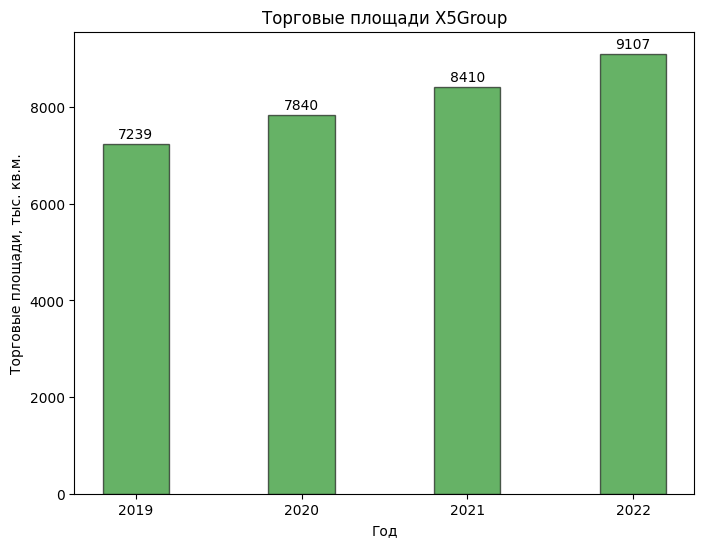

In [26]:
# кастомизированная столбчатая диаграмма
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

fig = plt.figure(figsize=(8, 6))
ax = plt.bar(df['Год'], df['Торговые площади X5Group, тыс. кв.м.'], 
        width=0.4, color='green', alpha=0.6, edgecolor='black')

# для подписи столбцов обязательно нужно, чтобы они были сохранены в отдельную переменную (здесь ax)
plt.bar_label(ax, padding=2)
plt.title('Торговые площади X5Group')
plt.xlabel('Год')
plt.ylabel('Торговые площади, тыс. кв.м.')

plt.show()

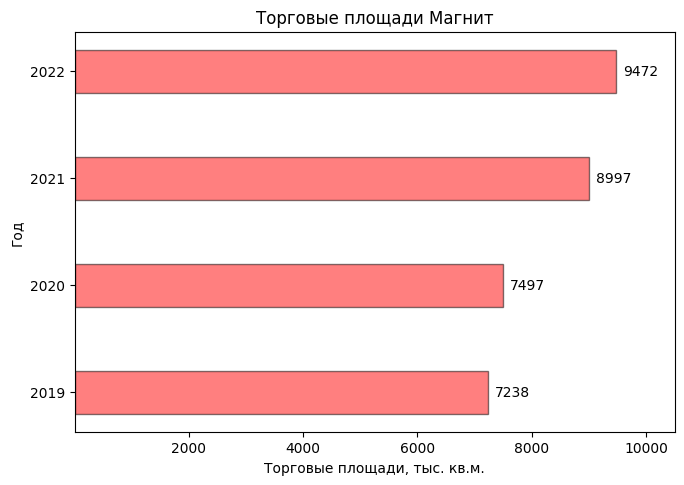

In [27]:
# кастомизированная столбчатая диаграмма с горизонтальным расположением столбцов
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

# отдельный холст и координатная плоскость созданы для принудительного задания размерности оси x, чтобы подписи не вылезали за край
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])

ax1 = ax.barh(df['Год'], df['Торговые площади Магнит, тыс. кв.м.'], 
        height=0.4, color='red', alpha=0.5, edgecolor='black')

# для подписи столбцов обязательно нужно, чтобы они были сохранены в отдельную переменную (здесь ax)
plt.bar_label(ax1, padding=5)
ax.set_xlim(0, 10500)
ax.set_xticks([2000, 4000, 6000, 8000, 10000])
plt.title('Торговые площади Магнит')
plt.xlabel('Торговые площади, тыс. кв.м.')
plt.ylabel('Год')

plt.show()

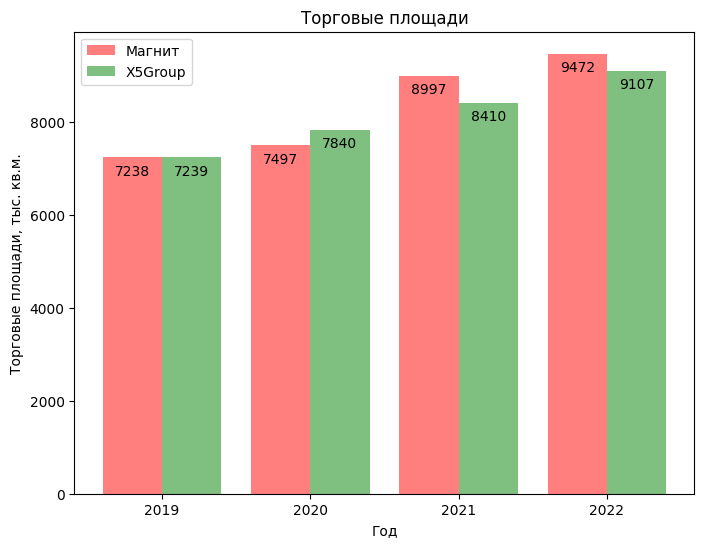

In [28]:
# пример построения графика со столбцами для двух переменных
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

fig = plt.figure(figsize=(8, 6))

w = 0.2
x = df.index.values

ax1 = plt.bar(x-w, df['Торговые площади Магнит, тыс. кв.м.'],
        width=w*2, color='red', alpha=0.5)

ax2 = plt.bar(x+w, df['Торговые площади X5Group, тыс. кв.м.'], 
        width=w*2, color='green', alpha=0.5)

plt.xticks(ticks=x, labels=df['Год'])

plt.bar_label(ax1, padding=(-15))
plt.bar_label(ax2, padding=(-15))
plt.legend(['Магнит', 'X5Group'])
plt.title('Торговые площади')
plt.xlabel('Год')
plt.ylabel('Торговые площади, тыс. кв.м.')

plt.show()

<Axes: title={'center': 'Торговые площади'}, xlabel='Год', ylabel='Торговые площади, тыс. кв.м.'>

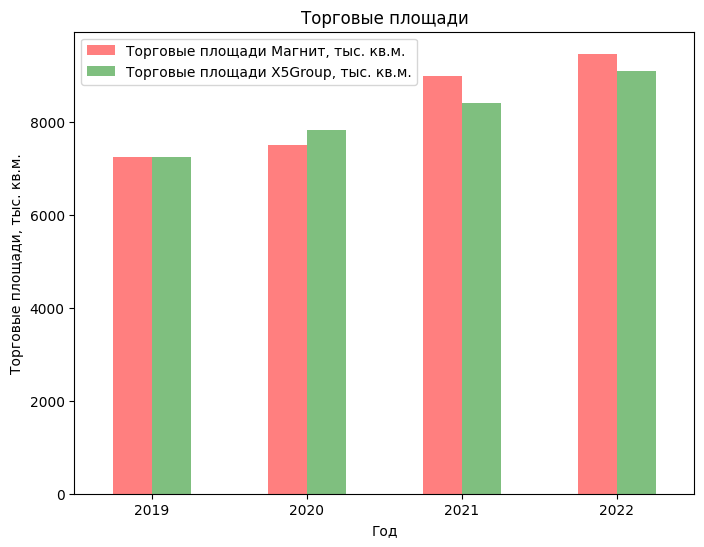

In [29]:
# пример построения аналогичного графика при помощи pd.plot()
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

df.plot(kind='bar', x='Год', xlabel='Год', ylabel='Торговые площади, тыс. кв.м.',
        figsize=(8, 6), color=['red', 'green'], alpha=0.5, rot=0,
        title='Торговые площади')

# **Функция plt.hist(). Гистограммы**

В библиотеке *matplotlib* за построение гистограммы отвечает функция `plt.hist()`. Параметру `x` этой функции передается массив (или массивы), по значениям которого будет построена гистограмма.

**Дополнительные параметры:**
* `bins`: количество столбцов (по умолчанию 10).
* `color`: цвет столбцов гистограммы.
* `edgecolor`: цвет границ столбцов.
* `histtype`: внешнее отображение гистограммы (по умолчанию `bar`). Имеет аргументы `step` и пр.
* `orientation`: тип отображения столбцов гистограммы (`orientation='horizontal'` - сделать горизонтальным).

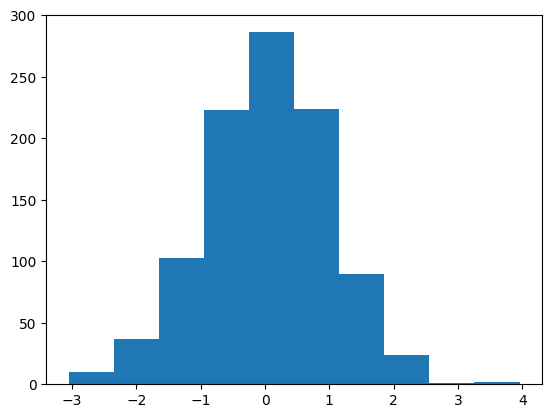

In [30]:
# пример дефолтной гистограммы
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

plt.hist(x=np.random.randn(1000))

plt.show()

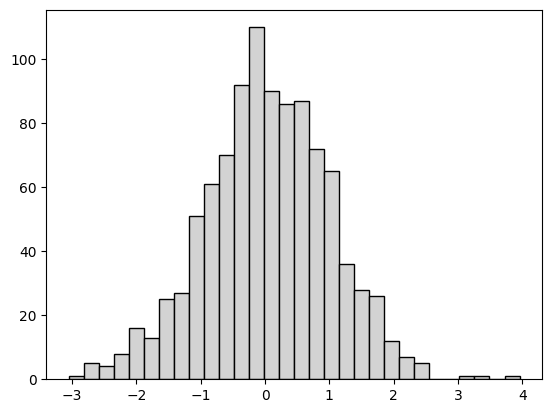

In [31]:
# пример кастомизированной гистограммы
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

plt.hist(x=np.random.randn(1000), color='lightgrey', edgecolor='black', bins=30)

plt.show()

# **Функция plt.boxplot(). Диаграммы размаха**

В *matplotlib* за построение диаграмм размаха (боксплот или "ящик с усами") отвечает функция `plt.boxplot()`. Принимает на вход массив (список, array, Series и т.д.) или несколько массивов.

**Дополнительные параметры:**
* `patch_artist`: True - использовать заливку межквартильного размаха, False (по умолчанию) - не использовать.
* `tick_labels`: подписи диаграмм размаха (в старых версиях *matplotlib* - `labels`).
* `vert`: True (по умолчанию) - вертикальное расположение диаграмм, False - горизонтальное.

Цвета графиков задаются через функцию `set_facecolor()`, которая применяется к каждому отдельному боксплоту. Доступ к ним можно получить либо через `ax['boxes']`, либо через цикл и функцию `zip()` (пример). Второй вариант предпочтительнее в случае нескольких графиков.

Цвет линии медиан можно изменять при помощи функции `set_color()`, которая применяется к каждой отдельной медиане. Доступ к ним можно получить либо через `ax['boxes']`, либо через цикл.

Примечание: сетку по линии ординат можно задать при помощи функции `Axes.yaxis.grid(True)`.

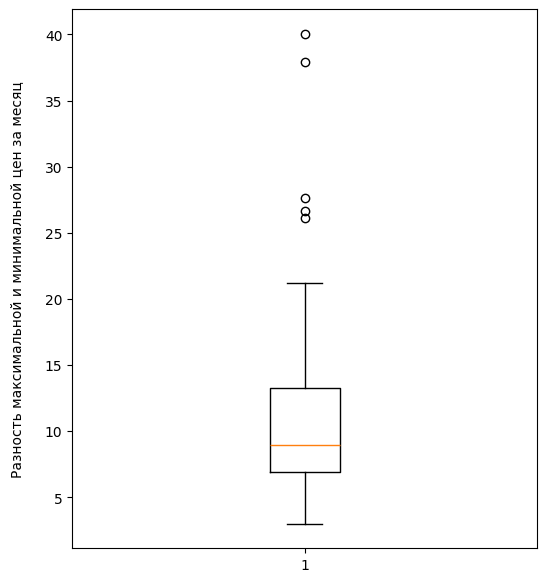

In [32]:
# пример стандартной диаграммы размаха
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/1244167/brent_m_2008_2023.csv')

plt.figure(figsize=(6, 7))

plt.boxplot(df['high-low'])

plt.ylabel('Разность максимальной и минимальной цен за месяц', 
           labelpad=15)

plt.show()

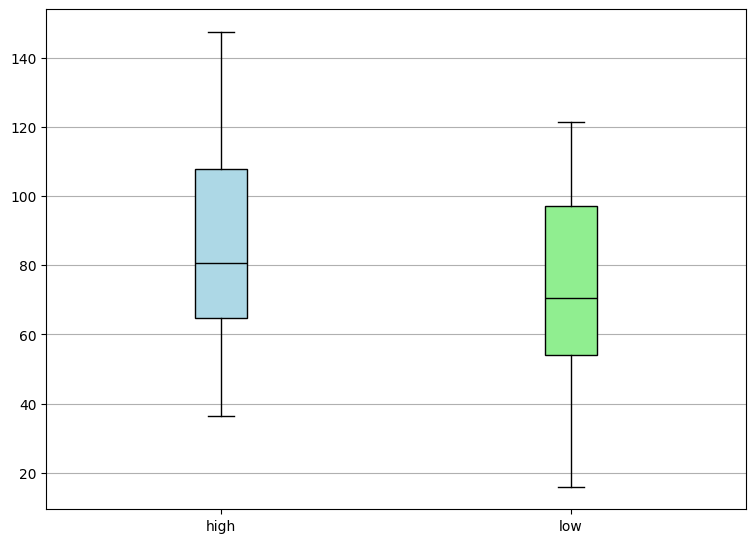

In [33]:
# пример кастомизированной диаграммы размаха для нескольких переменных
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://stepik.org/media/attachments/lesson/1244167/brent_m_2008_2023.csv')

fig = plt.figure(figsize=(7, 5))

ax = fig.add_axes([0, 0, 1, 1])

ax1 = ax.boxplot(df[['high', 'low']],
                 patch_artist=True,
                 tick_labels=['high', 'low'])

colors = ['lightblue', 'lightgreen']
for patch, color in zip(ax1['boxes'], colors):
    patch.set_facecolor(color)
# можно так
# ax['boxes'][0].set_facecolor('pink')
# ax['boxes'][1].set_facecolor('lightgreen')

# изменение цвета линии медианы
for median in ax1['medians']:
    median.set_color('black')

ax.yaxis.grid(True)

plt.show()

# **Функция plt.pie(). Круговые диаграммы**

В библиотеке *matplotlib* за построение круговых диаграмм отвечает функция `plt.pie()`.

**Дополнительные параметры:**
* `labels`: подписи долей.
* `wedgeprops`: позволяет видоизменять график. Принимает на вход словарь, который может содержать несколько дополнительных параметров.
* `shadow`: True - добавить тень диаграммы, False (по умолчанию) - не добавлять.
* `explode`: выдвинуть какую-то часть диаграммы. Принимает на вход список, в котором на месте, соответствующем выдвигаемой доли, должно быть число, отличное от 0.
* `startangle`: позволяет повернуть диаграмму на заданное значение угла. По умолчанию начало диаграммы - справа в середине (3 часа).
* `colors`: позволяет вручную задать цвета долей. Принимает на вход список с цветами для каждой доли.
* `radius`: позволяет задать радиус диаграммы. По умолчанию равен 1.
* `autopct`: позволяет отобразить на диаграмме числовое значение каждой доли, а также задать шаблон, в котором будут выводиться на график эти числовые значения (`'%1.1f%%'` - округление до десятых со знаком процента, `'%.2f'` - округление до сотых без знака процента и т.д.). 
* `pctdistance`: позволяет изменить местоположение числовых значений (по умолчанию 0.6).
* `labeldistance`: позволяет изменить местоположение меток долей (по умолчанию 1.1).

**Параметы wedgeprops**:
* `edgecolor`: цвет границ долей круговой диаграммы.
* `linewidth`: ширина границ долей.
* `width`: позволяет превратить круговую диаграмму в диаграмму-бублик. Принимает на вход число от 0 до 1, которое показывает, какую часть диаграммы оставить видимой.

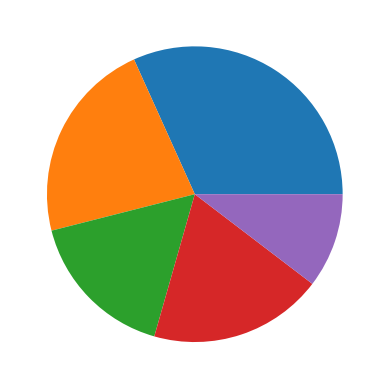

In [34]:
# пример построения дефолтной круговой диаграммы
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['Цех №1', 300],
             ['Цех №2', 210],
             ['Цех №3', 157],
             ['Цех №4', 180],
             ['Цех №5', 98]]
df_columns = ['Цех', 'Произведено деталей, шт']
df = pd.DataFrame(df_values, columns=df_columns)

plt.pie(df['Произведено деталей, шт'])

plt.show()

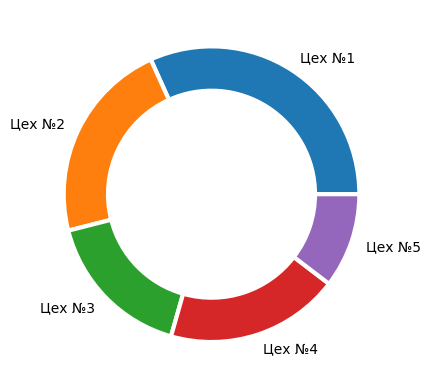

In [35]:
# пример построения кастомизированной круговой диаграммы
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['Цех №1', 300],
             ['Цех №2', 210],
             ['Цех №3', 157],
             ['Цех №4', 180],
             ['Цех №5', 98]]
df_columns = ['Цех', 'Произведено деталей, шт']
df = pd.DataFrame(df_values, columns=df_columns)

plt.pie(df['Произведено деталей, шт'],
        labels=df['Цех'],
        wedgeprops={'edgecolor': 'w', 'linewidth': 3, 'width': 0.3})

plt.show()

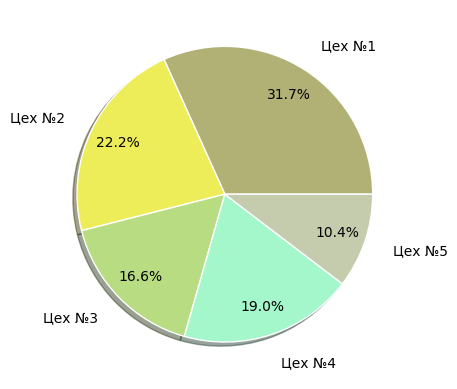

In [36]:
# пример построения кастомизированной круговой диаграммы с числовыми значениями долей
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['Цех №1', 300],
             ['Цех №2', 210],
             ['Цех №3', 157],
             ['Цех №4', 180],
             ['Цех №5', 98]]
df_columns = ['Цех', 'Произведено деталей, шт']
df = pd.DataFrame(df_values, columns=df_columns)

colors = ['#B1B176', '#EDED59', '#B7DC82', '#A4F6CB', '#C5CCAD']

plt.pie(df['Произведено деталей, шт'],
        labels=df['Цех'],
        wedgeprops={'edgecolor': 'w'},
        shadow=True,
        autopct='%1.1f%%',
        pctdistance=0.8,
        colors=colors, 
        labeldistance=1.2)

plt.show()

# **Функция plt.stackplot(). Стековые (накопительные) графики**

Функция `plt.stackplot()` позволяет строить стековые (накопительные) графики. Для построения графика нужно функции передать сначала значения для оси абсцисс, а затем последовательно передавать наборы данных для оси ординат.

**Дополнительные параметры:**
* `labels`: метки плоскостей (для легенды).
* `colors`: цвета плоскостей. На вход принимает список с цветами.
* `hatch`: штриховка графика.

Цвет штриховки графика меняется следующим образом:

`plt.rcParams['hatch.color'] = 'lightgrey'`

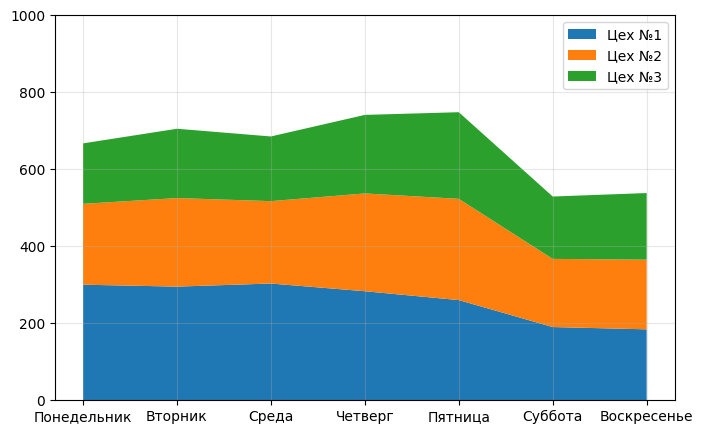

In [3]:
# построение дефолтного стекового графика с легендой
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['Понедельник', 300, 210, 157],
             ['Вторник', 295, 230, 180],
             ['Среда', 303, 214, 168],
             ['Четверг', 283, 254, 204],
             ['Пятница', 260, 263, 225],
             ['Суббота', 190, 177, 162],
             ['Воскресенье', 184, 181, 173]]
df_columns = ['День недели', 'Цех №1', 'Цех №2', 'Цех №3']
df = pd.DataFrame(df_values, columns=df_columns)

y1 = df['Цех №1']
y2 = df['Цех №2']
y3 = df['Цех №3']
x = df['День недели']
labels = ['Цех №1', 'Цех №2', 'Цех №3']

plt.figure(figsize=(8, 5))

plt.stackplot(x, y1, y2, y3, 
              labels=labels)

plt.ylim(0, 1000)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

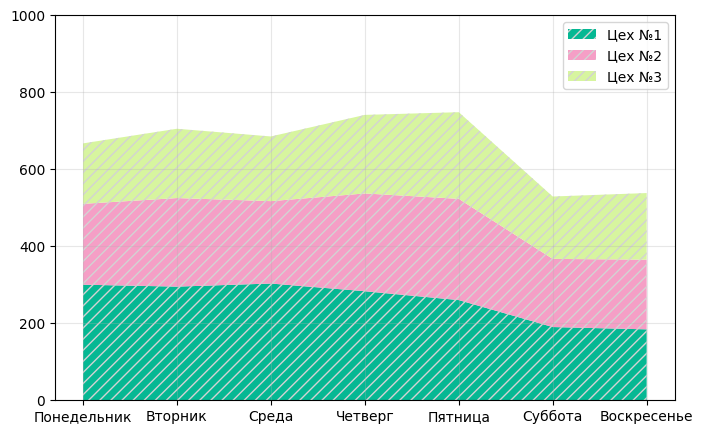

In [9]:
# построение кастомизированного стекового графика
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['Понедельник', 300, 210, 157],
             ['Вторник', 295, 230, 180],
             ['Среда', 303, 214, 168],
             ['Четверг', 283, 254, 204],
             ['Пятница', 260, 263, 225],
             ['Суббота', 190, 177, 162],
             ['Воскресенье', 184, 181, 173]]
df_columns = ['День недели', 'Цех №1', 'Цех №2', 'Цех №3']
df = pd.DataFrame(df_values, columns=df_columns)

y1 = df['Цех №1']
y2 = df['Цех №2']
y3 = df['Цех №3']
x = df['День недели']
labels = ['Цех №1', 'Цех №2', 'Цех №3']
colors = ['#05B893', '#F59FC6', '#D7F59F']

plt.figure(figsize=(8, 5))

plt.stackplot(x, y1, y2, y3, 
              labels=labels,
              colors=colors,
              hatch='///')

plt.ylim(0, 1000)
plt.grid(alpha=0.3)
plt.legend()
plt.rcParams['hatch.color'] = 'lightgrey'

plt.show()